Text classification is the task of assigning a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.We will classify the text into 9 categories.The 9 categories are:
- computer       
- science        
- politics       
- sport          
- automobile     
- religion        
- medicine       
- sales           
- alt.atheism

# Import Libraries

Let's first import all the required libraries

In [2]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from time import time
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from statistics import mean
import pickle
from tensorflow import keras
from keras import layers
from keras import losses
from keras import utils
from keras.layers.experimental.preprocessing import TextVectorization
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.models import load_model
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup

ModuleNotFoundError: No module named 'keras.layers.experimental'

# Load Dataset

Let's see the number of unique targets 

We are going to make a number of words column in which there is the number of words in a particular text

Check the basic stats of number of words, like maximum, minimum, average number of words

So the maximum number of words in our dataset is 11,765.Let's have a look at it

So maximu number of words text is belongs to electronics category.In our dataset we have some rows where there are no text at all i.e. the number of words is 0.We will drop those rows

# Data Pre-Processing

Now it's time to clean our dataset, we will lower the text, remove the text in square brackets, remove links and remove words containing numbers

Let's convert our cleaned text into tokens

Stopwords are those english words which do not add much meaning to a sentence.They are very commonly used words and we do not required those words. So we can remove those stopwords

Let's check number of stopwords in nltk library

Now we are going to remome the stopwords from the sentences

It's time to do lemmatization

Now we are going to combine our text, this is our final text

So we have cleaned the dataset and remove stopwords, it's possible that there are rows in which the text length is 0.We will find those rows and remove them

In [3]:
file_path = "df3.csv"
# Read the Excel file
df = pd.read_csv(file_path)

In [4]:
df

,normalized_x,manual
0,jurus kimia aktif laksana praktisi ajar,netral
1,tetap kuliah offline lebih baik nder bakal cap...,negatif
2,kelar studpen terbit serah terima jabat rabes ...,negatif
3,kak tumpang share iya teman sekira alami sedia...,positif
4,studpen tambah uu,netral
...,...,...
8338,ambis iisma bingung mulai mana please tutor pa...,netral
8339,teman email about the timeline nya iisma supri...,netral
8340,merdeka ajar merdeka ajar orkay jabat,negatif
8341,semester baru mau join program kampus merdeka ...,netral


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Pisahkan data berdasarkan keyword
df_iisma = df[df['normalized_x'].str.contains('iisma', case=False, na=False)]
df_kampus_mengajar = df[df['normalized_x'].str.contains('kampus mengajar|kamjar', case=False, na=False)]
df_studpen = df[df['normalized_x'].str.contains('studi independen|studpen', case=False, na=False)]
df_msib = df[df['normalized_x'].str.contains('magang msib|msib', case=False, na=False)]


# Hitung proporsi label untuk setiap keyword
prop_iisma = df_iisma['manual'].value_counts(normalize=True).sort_index()
prop_kampus_mengajar = df_kampus_mengajar['manual'].value_counts(normalize=True).sort_index()
prop_studpen = df_studpen['manual'].value_counts(normalize=True).sort_index()
prop_msib = df_msib['manual'].value_counts(normalize=True).sort_index()

# Gabungkan proporsi ke dalam satu dataframe
prop_df = pd.DataFrame({
    'iisma': prop_iisma,
    'kampus_mengajar': prop_kampus_mengajar,
    'studpen' : prop_studpen,
    "msib" : prop_msib
}).fillna(0).reset_index()

# Plot barplot
prop_df_melt = prop_df.melt(id_vars='index', var_name='keyword', value_name='proportion')
sns.barplot(x='keyword', y='proportion', hue='index', data=prop_df_melt)
plt.xlabel('Keyword')
plt.ylabel('Proportion')
plt.title('Proportion of Labels for Keywords')
plt.legend(title='Label')
plt.show()


KeyError: 'index'

In [56]:
d = ' '.join(df_iisma[df_iisma['manual'] == "negatif"]['normalized_x'])


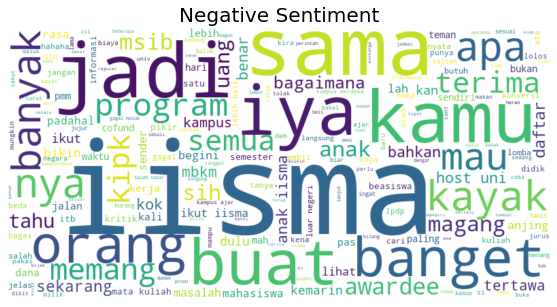

In [57]:
create_wordcloud(d, title='Negative Sentiment')

In [17]:
# kamus 2
sw_id2 = pd.read_csv("https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",header=None)
sw_id2 = list(sw_id1[0])

# kamus 3
sw_id3 = ['kalau', 'terus']

# Tambahkan kamus lainnya
# ....

# Gabungkan
sw_id =  sw_id2 + sw_id3

sw_id

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
# Fungsi menghapus stopword
def stopwords_removal(words,stopword):
    return [word for word in words if word not in stopword]

def preprocess_text(text, slang_words = sl_word, sw = sw_id):
    # SlangWords Handling
   # text = ' '.join([slang_words.get(word, word) for word in text.split()])

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)

    # Stop Words Removal
    text = text.split()
    text = " ".join(stopwords_removal(text, sw))

    return text

In [ ]:
# Terapkan pada dataset
df2_pre = df2_clean.copy()
df2_pre.Text = df2_pre.Text.apply(preprocess_text)

# Sebelum, sesudah cleaning, dan sesudah preprocessing
display(df2.head(3), df2_clean.head(3), df2_pre.head(3))

# perlu beberapa menit untuk menyelesaikan tahapan pre-processing data ini

In [14]:
pos = df[df["manual"]=="positif"]

In [10]:
# Fungsi untuk membuat WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import spacy
from nltk.stem import WordNetLemmatizer
import string
def create_wordcloud(text, title=None):
    if text.strip() == "":
        print(f"No words to plot for {title}")
        return
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, size=20)
    plt.show()




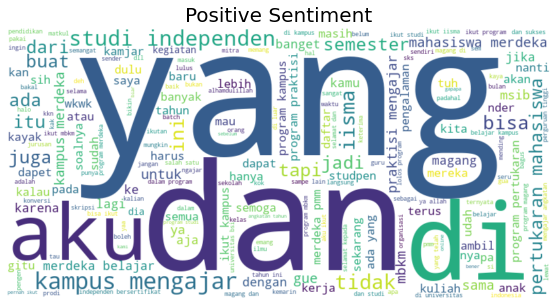

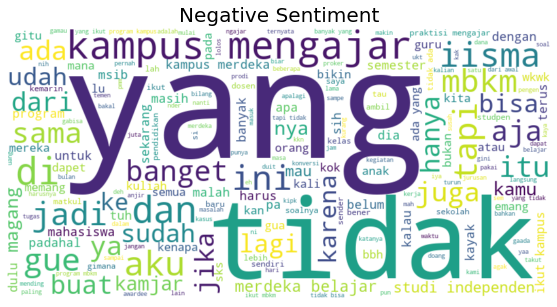

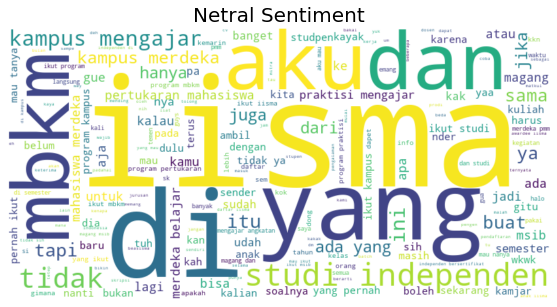

In [11]:
# Menggabungkan teks berdasarkan sentimen
positive_text = ' '.join(df[df['manual'] == "positif"]['normalized_x'])
negative_text = ' '.join(df[df['manual'] == "negatif"]['normalized_x'])
netral_text = ' '.join(df[df['manual'] == "netral"]['normalized_x'])

# Membuat WordCloud untuk sentimen relevan
create_wordcloud(positive_text, title='Positive Sentiment')

# Membuat WordCloud untuk sentimen tidak relevan
create_wordcloud(negative_text, title='Negative Sentiment')

create_wordcloud(netral_text, title='Netral Sentiment')

# Visualisasi distribusi sentimen menggunakan Plotly
fig = go.Figure([go.Bar(x=df['manual'].value_counts().index, y=df['manual'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values"
)
fig.show()

In [13]:
df[df['manual'] == "positif"]['normalized_x']

0       jurusan kimia aktif melaksanakan praktisi meng...
6       ya allah gapapa semester kali ini keterima stu...
7       kalau aku karena belum berpengalaman banyak ja...
8       hallo igovers kita baru aja kedatangan kak far...
11      radar bogor praktisi mengajar sukses berikan i...
                              ...                        
9513    magang kalau ada program kampus merdeka ikut a...
9517    kuliah di universitas mathlaul anwar banten un...
9518    bismillah ya allah mari kita usahakan daftar i...
9521    bisa bangett urutan yang enaknya emang gitu am...
9528    telumbkm selamat kepada mahasiswai telkom univ...
Name: normalized_x, Length: 2927, dtype: object

Now our text has been cleaned, we will convert the labels into numeric values using LableEncoder()

In [110]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['target']= label_encoder.fit_transform(df['manual'])
  
df['target'].unique()

array([2, 0, 1])

# Dependent and Independent Variable

In [59]:
# dependent and independent variable
X = df['normalized_x']
y = df['manual']

In [61]:
df

,normalized_x,manual
0,jurus kimia aktif laksana praktisi ajar,netral
1,tetap kuliah offline lebih baik nder bakal cap...,negatif
2,kelar studpen terbit serah terima jabat rabes ...,negatif
3,kak tumpang share iya teman sekira alami sedia...,positif
4,studpen tambah uu,netral
...,...,...
8338,ambis iisma bingung mulai mana please tutor pa...,netral
8339,teman email about the timeline nya iisma supri...,netral
8340,merdeka ajar merdeka ajar orkay jabat,negatif
8341,semester baru mau join program kampus merdeka ...,netral


In [60]:
X.shape,y.shape

((8343,), (8343,))

# Bag-of-Words

CountVectorizer is used to transform a given text into a vector on the basis of the frequency(count) of each word that occurs in the entire text.It involves counting the number of occurences each words appears in a document(text)

In [62]:
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(X)
print(count_vector[0].todense())

[[0 0 0 ... 0 0 0]]


# Tf-Idf

Tf-Idf stands for Term Frequency-Inverse document frequency.It is a techinque to quantify a word in documents,we generally compute a weight to each word which signifies the importance of the word which signifies the importance of the word in the document and corpus

In [63]:
tfidf_vectorizer = TfidfVectorizer(min_df = 2,max_df = 0.5,ngram_range = (1,2))
tfidf = tfidf_vectorizer.fit_transform(X)
print(tfidf[0].todense())

[[0. 0. 0. ... 0. 0. 0.]]


# SMOTE technique to balance the dataset

So we can clearly see that our dataset is imbalanced dataset.We will use SMOTE technique to balance the dataset.SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.The algorithm helps to overcome the overfitting problem posed by random sampling. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='manual', ylabel='count'>

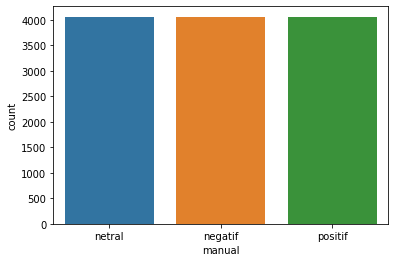

In [64]:
# count vector
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(count_vector,y)


sns.countplot(Y_smote)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='manual', ylabel='count'>

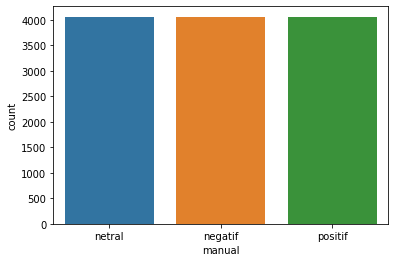

In [65]:
# tfidf
smote = SMOTE(random_state = 402)
X_smote_tfidf, Y_smote_tfidf = smote.fit_resample(tfidf,y)

sns.countplot(Y_smote_tfidf)

## Train-Test Split

In [66]:
# train-test split countvector
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size = 0.30, random_state = 0)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((8521, 12684), (3653, 12684), (8521,), (3653,))

In [67]:
# train-test split tfidf
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_smote_tfidf, Y_smote_tfidf , test_size = 0.20, random_state = 0)

In [68]:
training_time_container = {'linear_svm_tfidf':0,'linear_svm':0,'mnb_naive_bayes_tfidf':0,
                         'mnb_naive_bayes':0,'random_forest_tfidf':0,'random_forest':0,
                          'logistic_reg':0,'logistic_reg_tfidf':0}
prediction_time_container = {'linear_svm_tfidf':0,'linear_svm':0,'mnb_naive_bayes_tfidf':0,
                         'mnb_naive_bayes':0,'random_forest_tfidf':0,'random_forest':0,
                            'logistic_reg':0,'logistic_reg_tfidf':0}
accuracy_container = {'linear_svm_tfidf':0,'linear_svm':0,'mnb_naive_bayes_tfidf':0,
                         'mnb_naive_bayes':0,'random_forest_tfidf':0,'random_forest':0,
                     'logistic_reg':0,'logistic_reg_tfidf':0}

# Logistic Regression

In [69]:
# on countvector
lg = LogisticRegression(C = 1.0)
#Fitting the model 
t0=time()
lg.fit(X_train,y_train)
training_time_container['logistic_reg']=time()-t0


# Predicting the Test set results
t0 = time()
y_pred_lg = lg.predict(X_test)
prediction_time_container['logistic_reg']=time()-t0

lg_test_accuracy =  accuracy_score(y_test,y_pred_lg)
accuracy_container['logistic_reg'] = lg_test_accuracy

print('Training Accuracy : ', accuracy_score(y_train,lg.predict(X_train)))
print('Testing Accuracy: ',lg_test_accuracy)
print("Training Time: ",training_time_container['logistic_reg'])
print("Prediction Time: ",prediction_time_container['logistic_reg'])
print(confusion_matrix(y_test,y_pred_lg))

Training Accuracy :  0.8574111019833353
Testing Accuracy:  0.6496030659731727
Training Time:  3.039950132369995
Prediction Time:  0.0016629695892333984
[[949 125 192]
 [239 690 275]
 [250 199 734]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [70]:
# on tfidf
lg = LogisticRegression(C = 1.0)
#Fitting the model 
t0=time()
lg.fit(X_train_tfidf,y_train_tfidf)
training_time_container['logistic_reg_tfidf']=time()-t0

# Predicting the Test set results
t0=time()
ypred_lg_tf = lg.predict(X_test_tfidf)
prediction_time_container['logistic_reg_tfidf']=time()-t0

lg_test_accuracy_tf  = accuracy_score(y_test_tfidf,ypred_lg_tf)
accuracy_container['logistic_reg_tfidf'] = lg_test_accuracy_tf

print('Training Accuracy: ', accuracy_score(y_train_tfidf,lg.predict(X_train_tfidf)))
print('Testing Accuracy: ', lg_test_accuracy_tf)
print("Training Time: ",training_time_container['logistic_reg_tfidf'])
print("Prediction Time: ",prediction_time_container['logistic_reg_tfidf'])
print(confusion_matrix(y_test,ypred_lg_tf))

Training Accuracy:  0.9001950918985522
Testing Accuracy:  0.7724845995893224
Training Time:  4.31186842918396
Prediction Time:  0.0017371177673339844


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



ValueError: Found input variables with inconsistent numbers of samples: [3653, 2435]

## Multinomial Naive Bayes

In [72]:
# on countvector
nb = MultinomialNB()
#Fitting the model 
t0=time()
nb.fit(X_train,y_train)
training_time_container['mnb_naive_bayes']=time()-t0


# Predicting the Test set results
t0 = time()
y_pred_nb = nb.predict(X_test)
prediction_time_container['mnb_naive_bayes']=time()-t0

mnb_test_accuracy =  accuracy_score(y_test,y_pred_nb)
accuracy_container['mnb_naive_bayes'] = mnb_test_accuracy

print('Training Accuracy : ', accuracy_score(y_train,nb.predict(X_train)))
print('Testing Accuracy: ',mnb_test_accuracy)
print("Training Time: ",training_time_container['mnb_naive_bayes'])
print("Prediction Time: ",prediction_time_container['mnb_naive_bayes'])
print(confusion_matrix(y_test,y_pred_nb))

Training Accuracy :  0.7222157023823494
Testing Accuracy:  0.598412263892691
Training Time:  0.033417463302612305
Prediction Time:  0.0012226104736328125
[[811 216 239]
 [263 659 282]
 [225 242 716]]


In [73]:
# on tfidf
nb = MultinomialNB()
#Fitting the model 
t0=time()
nb.fit(X_train_tfidf,y_train_tfidf)
training_time_container['mnb_naive_bayes_tfidf']=time()-t0

# Predicting the Test set results
t0=time()
ypred_nb_tf = nb.predict(X_test_tfidf)
prediction_time_container['mnb_naive_bayes_tfidf']=time()-t0

mnb_tfidf_test_accuracy = accuracy_score(y_test_tfidf,ypred_nb_tf)
accuracy_container['mnb_naive_bayes_tfidf'] = mnb_tfidf_test_accuracy 


print('Training Accuracy: ', accuracy_score(y_train_tfidf,nb.predict(X_train_tfidf)))
print('Testing Accuracy: ',mnb_tfidf_test_accuracy )
print("Training Time: ",training_time_container['mnb_naive_bayes_tfidf'])
print("Prediction Time: ",prediction_time_container['mnb_naive_bayes_tfidf'])
print(confusion_matrix(y_test,ypred_nb_tf))

Training Accuracy:  0.8474175993428483
Testing Accuracy:  0.7326488706365503
Training Time:  0.04213714599609375
Prediction Time:  0.0010263919830322266


ValueError: Found input variables with inconsistent numbers of samples: [3653, 2435]

## SVM using Stochastic Gradient Descent

In [74]:
# Used hinge loss which gives linear Support Vector Machine. Also set the learning rate to 0.0001 (also the default value)
# which is a constant that's gets multiplied with the regularization term. For penalty, I've used L2 which is the standard
#regularizer for linear SVMs


# on countvector
svm_classifier = linear_model.SGDClassifier(loss='hinge',alpha=0.0001)
t0=time()
svm_classifier.fit(X_train,y_train)
training_time_container['linear_svm']=time()-t0

# Predicting the Test set results
t0=time()
y_pred_svm = svm_classifier.predict(X_test)
prediction_time_container['linear_svm']=time()-t0

svm_test_accuracy  = accuracy_score(y_test,y_pred_svm)
accuracy_container['linear_svm'] = svm_test_accuracy 

print('Training Accuracy : ', accuracy_score(y_train,svm_classifier.predict(X_train)))
print('Testing Accuracy: ',svm_test_accuracy )
print("Training Time: ",training_time_container['linear_svm'])
print("Prediction Time: ",prediction_time_container['linear_svm'])
print(confusion_matrix(y_test,y_pred_svm))

Training Accuracy :  0.8703203849313461
Testing Accuracy:  0.6485080755543389
Training Time:  0.27957844734191895
Prediction Time:  0.0017652511596679688
[[1016  121  129]
 [ 264  669  271]
 [ 311  188  684]]


In [75]:
# on tfidf
svm_classifier = linear_model.SGDClassifier(loss='hinge',alpha=0.0001)
#Fitting the model 
t0=time()
svm_classifier.fit(X_train_tfidf,y_train_tfidf)
training_time_container['linear_svm_tfidf']=time()-t0

# Predicting the Test set results
t0=time()
ypred_svm_tf = svm_classifier.predict(X_test_tfidf)
prediction_time_container['linear_svm_tfidf']=time()-t0

svm_test_accuracy_tf  = accuracy_score(y_test_tfidf,ypred_svm_tf)
accuracy_container['linear_svm_tfdif'] = svm_test_accuracy_tf 

print('Training Accuracy: ', accuracy_score(y_train_tfidf,svm_classifier.predict(X_train_tfidf)))
print('Testing Accuracy: ', svm_test_accuracy_tf)
print("Training Time: ",training_time_container['linear_svm_tfidf'])
print("Prediction Time: ",prediction_time_container['linear_svm_tfidf'])
print(confusion_matrix(y_test,ypred_svm_tf))

Training Accuracy:  0.9377759523565048
Testing Accuracy:  0.7963039014373716
Training Time:  0.18801283836364746
Prediction Time:  0.0021517276763916016


ValueError: Found input variables with inconsistent numbers of samples: [3653, 2435]

## RandomForest 

In [76]:
# on count vectorizer
rf = RandomForestClassifier(n_estimators=50)
t0=time()
rf.fit(X_train,y_train)
training_time_container['random_forest']=time()-t0

# Predicting the Test set results
t0=time()
y_pred_rf = rf.predict(X_test)
prediction_time_container['random_forest']=time()-t0

rf_test_accuracy  = accuracy_score(y_test,y_pred_rf)
accuracy_container['random_forest'] = rf_test_accuracy 


print('Training Accuracy : ', accuracy_score(y_train,rf.predict(X_train)))
print('Testing Accuracy: ',rf_test_accuracy )
print("Training Time: ",training_time_container['random_forest'])
print("Prediction Time: ",prediction_time_container['random_forest'])
print(confusion_matrix(y_test,y_pred_rf))

Training Accuracy :  0.9626804365684779
Testing Accuracy:  0.6452231042978374
Training Time:  12.484625339508057
Prediction Time:  0.12225174903869629
[[941 130 195]
 [232 647 325]
 [202 212 769]]


In [77]:
# on tfidf
rf = RandomForestClassifier(n_estimators=50)
#Fitting the model 
t0=time()
rf.fit(X_train_tfidf,y_train_tfidf)
training_time_container['random_forest_tfidf']=time()-t0

# Predicting the Test set results
t0=time()
ypred_rf_tf = rf.predict(X_test_tfidf)
prediction_time_container['random_forest_tfidf']=time()-t0

rf_test_accuracy_tf  = accuracy_score(y_test_tfidf,ypred_rf_tf)
accuracy_container['random_forest_tfidf'] = rf_test_accuracy_tf

print('Training Accuracy: ', accuracy_score(y_train_tfidf,rf.predict(X_train_tfidf)))
print('Testing Accuracy: ',rf_test_accuracy_tf )
print("Training Time: ",training_time_container['random_forest_tfidf'])
print("Prediction Time: ",prediction_time_container['random_forest_tfidf'])
print(confusion_matrix(y_test,ypred_rf_tf ))

Training Accuracy:  0.9988705205873293
Testing Accuracy:  0.8016427104722793
Training Time:  8.442264080047607
Prediction Time:  0.0804436206817627


ValueError: Found input variables with inconsistent numbers of samples: [3653, 2435]

In [91]:
fig=go.Figure(data=[go.Bar(y=list(training_time_container.values()),x=list(training_time_container.keys()),
                           marker={'color':np.arange(len(list(training_time_container.values())))}
                          ,text=list(training_time_container.values()), textposition='auto' )])

fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)',
                  title="Comparison of Training Time of different classifiers",
                    xaxis_title="Machine Learning Models",
                    yaxis_title="Training time in seconds" )

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"  
fig

In [92]:
fig=go.Figure(data=[go.Bar(y=list(prediction_time_container.values()),x=list(prediction_time_container.keys()),
                           marker={'color':np.arange(len(list(prediction_time_container.values())))}
                          ,text=list(prediction_time_container.values()), textposition='auto' )])

fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)',
                  title="Comparison of Prediction Time of different classifiers",
                    xaxis_title="Machine Learning Models",
                    yaxis_title="Prediction time in seconds" )

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"  
fig

In [93]:
fig=go.Figure(data=[go.Bar(y=list(accuracy_container.values()),x=list(accuracy_container.keys()),
                           marker={'color':np.arange(len(list(accuracy_container.values())))}
                          ,text=list(accuracy_container.values()), textposition='auto' )])

fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)',
                  title="Comparison of Accuracy Scores of different classifiers",
                    xaxis_title="Machine Learning Models",
                    yaxis_title="Accuracy Scores" )

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"  
fig

# Stratified K-fold CV

In machine learning, when we want to train our ML model we split our entire dataset into train set and test set using train test split class present in sklearn.Then we train our model on train set and test our model on test set. The problems that we face are, whenever we change the random_state parameter present in train_test_split(), we get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model.<br>
The solution for the this problem is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffer from second problem i.e. random sampling.<br>
The solution for both first and second problem is to use Stratified K-Fold Cross-Validation.Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

## SVM

In [94]:
svm_skcv = linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

# StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_svm = []
   
for train_index, test_index in skf.split(X_smote_tfidf,Y_smote_tfidf):
    x_train_fold, x_test_fold = X_smote_tfidf[train_index], X_smote_tfidf[test_index]
    y_train_fold, y_test_fold = Y_smote_tfidf[train_index], Y_smote_tfidf[test_index]
    svm_skcv.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_svm.append(svm_skcv.score(x_test_fold, y_test_fold))
   
# Print the output.
print('List of possible accuracy:', lst_accu_stratified_svm)
print('\nMaximum Accuracy That can be obtained from this model is:',max(lst_accu_stratified_svm)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified_svm)*100, '%')
print('\nOverall Accuracy:',mean(lst_accu_stratified_svm)*100, '%')

List of possible accuracy: [0.808868501529052, 0.786697247706422, 0.7691131498470948, 0.7912844036697247, 0.8018362662586075, 0.7941851568477429, 0.8026013771996939, 0.7987758224942617, 0.774292272379495, 0.7964804896710023]

Maximum Accuracy That can be obtained from this model is: 80.8868501529052 %

Minimum Accuracy: 76.91131498470948 %

Overall Accuracy: 79.24134687603097 %


## RandomForest

In [95]:
rf_skcv = RandomForestClassifier(n_estimators=50)

# StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_rf = []
   
for train_index, test_index in skf.split(X_smote_tfidf,Y_smote_tfidf):
    x_train_fold, x_test_fold = X_smote_tfidf[train_index], X_smote_tfidf[test_index]
    y_train_fold, y_test_fold = Y_smote_tfidf[train_index], Y_smote_tfidf[test_index]
    rf_skcv.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_rf.append(rf_skcv.score(x_test_fold, y_test_fold))
   
# Print the output.
print('List of possible accuracy:', lst_accu_stratified_rf)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified_rf)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified_rf)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified_rf)*100, '%')

List of possible accuracy: [0.7584097859327217, 0.77217125382263, 0.7331804281345565, 0.7622324159021406, 0.7589900535577658, 0.7658760520275439, 0.7666411629686305, 0.7735271614384086, 0.7697016067329763, 0.7834736036725325]

Maximum Accuracy That can be obtained from this model is: 78.34736036725324 %

Minimum Accuracy: 73.31804281345565 %

Overall Accuracy: 76.44203524189906 %


## Multinomial Naive Bayes

In [96]:
nb_skcv = MultinomialNB()

# StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_nb = []
   
for train_index, test_index in skf.split(X_smote_tfidf,Y_smote_tfidf):
    x_train_fold, x_test_fold = X_smote_tfidf[train_index], X_smote_tfidf[test_index]
    y_train_fold, y_test_fold = Y_smote_tfidf[train_index], Y_smote_tfidf[test_index]
    nb_skcv.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_nb.append(nb_skcv.score(x_test_fold, y_test_fold))
   
# Print the output.
print('List of possible accuracy:', lst_accu_stratified_nb)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified_nb)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified_nb)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified_nb)*100, '%')

List of possible accuracy: [0.7415902140672783, 0.75, 0.7148318042813455, 0.7415902140672783, 0.7459831675592961, 0.7505738332058148, 0.7513389441469013, 0.749043611323642, 0.722264728385616, 0.7498087222647284]

Maximum Accuracy That can be obtained from this model is: 75.13389441469013 %

Minimum Accuracy: 71.48318042813455 %

Overall Accuracy: 74.17025239301901 %


# Save the models

# LSTM

We will not going to create RNN model due to its vanishing gradient problem instead of that we will going to create LSTM model.LSTMs have an additional state called ‘cell state’ through which the network makes adjustments in the information flow. The advantage of this state is that the model can remember or forget the leanings more selectively.
First of all we are going to do tokenization then we will generate sequence of n-grams.After that we will going to do padding.Padding is required because all the sentences are of different length so we need to make them of same length.We will going to do this by adding 0 in the end of the text with the help of pad_sequences function of keras

In [6]:
max_features = 10000     # the maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features )
tokenizer.fit_on_texts(df['normalized_x'].values)

In [7]:
X = tokenizer.texts_to_sequences(df['normalized_x'].values)
X = pad_sequences(X, padding = 'post', maxlen = 10000 )

In [8]:
X

array([[ 128, 1214,  414, ...,    0,    0,    0],
       [ 123,   23,  559, ...,    0,    0,    0],
       [ 584,   48, 1138, ...,    0,    0,    0],
       ...,
       [   3,    1,    3, ...,    0,    0,    0],
       [  15,   54,   16, ...,    0,    0,    0],
       [3286,  932,   20, ...,    0,    0,    0]], dtype=int32)

In [108]:
X.shape[1]

100000

In [9]:
Y = pd.get_dummies(df['manual']).values

In [99]:
Y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42,stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6257, 10000) (6257, 3)
(2086, 10000) (2086, 3)


In [11]:
embid_dim = 300
lstm_out = 32


model = keras.Sequential()
model.add(Embedding(max_features, embid_dim, input_length = X.shape[1] ))
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 300)        3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                85248     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 3,087,427
Trainable params: 3,087,427
Non-trainable params: 0
______________________________________________

So our model is created now it's time to train our model, we will going to use 10 epochs

In [ ]:
batch_size = 128
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1, validation_data= (X_test, Y_test),callbacks=[earlystop])

Epoch 1/10
49/49 [==============================] - 1918s 39s/step - loss: 1.0564 - accuracy: 0.4585 - val_loss: 0.9626 - val_accuracy: 0.5345
Epoch 2/10
26/49 [==============>...............] - ETA: 16:51 - loss: 0.9358 - accuracy: 0.5690

### Plot Accuracy and Loss

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

### Save LSTM model

In [ ]:
model.save('lstm.h5')

# BERT

So now we will going to make the bert model.In our kernel we have less memory so we will going to take 50% of our dataset

In [53]:
df_bert = df

In [54]:
df_bert.reset_index(inplace=True)

In [55]:
df_bert['manual'].value_counts()

netral     4358
positif    2927
negatif    2253
Name: manual, dtype: int64

So our dataset is imbalanced, we split the dataset in a stratified way

In [56]:
X_train, X_val, y_train, y_val = train_test_split(df_bert.index.values, 
                                                  df_bert.target.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df_bert.target.values)

In [57]:
df_bert['data_type'] = ['not_set']*df_bert.shape[0]

df_bert.loc[X_train, 'data_type'] = 'train'
df_bert.loc[X_val, 'data_type'] = 'val'

Now we will construct the BERT Tokenizer.Based on wordpiece.We will intantiate a pre-trained model configuration to encode our data

In [60]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

- To convert all the titles from text into encoded form, we use a function called *batch_encode_plus* and we will proceed train and test data seperately.The first parameter inside the function is the text.
- *add_special_tokens = True* means the sequences will encoded with the special tokens realtive to their model
- *return_attention_mask=True* returns the attention mask according to the special tokenizer defined by *max_length* attribute

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    df_bert[df_bert.data_type=='train'].final_text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df_bert[df_bert.data_type=='val'].final_text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df_bert[df_bert.data_type=='train'].target.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df_bert[df_bert.data_type=='val'].target.values)

Now we got encoded dataset, we can create training data and validation data

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
# length of training and validation data 
len(dataset_train), len(dataset_val)

We are treating each title as its unique sequence, so one sequence will be classified into one of the 12 labels

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=12,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

DataLoader combines a dataset and a sampler and provides an iterable over the given dataset.

In [ ]:
batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [ ]:
epochs = 3

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

We will use f1 score as a performance metrics

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

### Training loop

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    #model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
        
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')